### Importar librerias 

In [2]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
from scipy.stats import truncnorm

#### Leer Dataset

In [3]:
dfi = pd.read_csv('education_career_success.csv')
dfi

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


#### Tipos de datos

In [ ]:
dfi.dtypes.tolist()



[dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O')]

In [ ]:
dfi.columns = ['student_id', 'age', 'gender', 'high_school_gpa', 'sat_score', 'university_ranking', 'university_gpa', 
              'field_of_study', 'internship_completed', 'projects_completed', 'certifications', 'soft_skills_score',
              'networking_score', 'job_offers', 'starting_salary', 'career_satisfaction', 'years_to_promotion',
              'current_job_level', 'work_life_balance', 'entrepreneurship']

In [ ]:
df = dfi.loc[:, ['age', 'gender', 'high_school_gpa', 'sat_score', 'university_ranking', 'university_gpa', 
              'field_of_study', 'internship_completed', 'projects_completed', 'certifications', 'soft_skills_score',
              'networking_score', 'job_offers', 'starting_salary', 'career_satisfaction', 'years_to_promotion',
              'current_job_level', 'work_life_balance']]

In [ ]:
num_cols = []
for c in df.columns:
    if df[c].dtypes == 'int64' or df[c].dtypes == 'float64':
        num_cols.append( c )


In [ ]:
cat_cols = []
for c in df.columns:
    if df[c].dtypes == 'O':
        cat_cols.append( c )


In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
num_cols

['age',
 'high_school_gpa',
 'sat_score',
 'university_ranking',
 'university_gpa',
 'internship_completed',
 'projects_completed',
 'certifications',
 'soft_skills_score',
 'networking_score',
 'job_offers',
 'starting_salary',
 'career_satisfaction',
 'years_to_promotion',
 'work_life_balance']

In [ ]:
cat_cols

['gender', 'field_of_study', 'current_job_level']

In [ ]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "job_offers": ["count"]
})

prob_freq.columns = cat_cols + ["user"]

In [ ]:
prob_freq.head(2)

,gender,field_of_study,current_job_level,user
0,Female,Arts,Entry,183
1,Female,Arts,Executive,18


In [ ]:
cat_cols = ['platform', 'genre', 'publisher', 'year']  # Columnas categóricas
num_col = 'global_sales'  # Columna numérica, cambia por otra si lo deseas

# Especifica tus filtros de manera dinámica
# Puedes cambiar estos valores según lo que necesites
filters = {
    "platform": "PS4",  # Cambiar por el valor que necesites filtrar
    "genre": "Action",  # Cambiar por el valor que necesites filtrar
    "publisher": "Nintendo",  # Cambiar por el valor que necesites filtrar
    "year": 2020  # Cambiar por el valor que necesites filtrar
}

# Filtrar el DataFrame según los filtros dinámicos
filtered_df = df
for col, val in filters.items():
    filtered_df = filtered_df[filtered_df[col] == val]

# Graficar el boxplot para la columna numérica
filtered_df.boxplot(column=[num_col])
plt.title(f'Boxplot de {num_col} filtrado por: {", ".join([f"{key}={value}" for key, value in filters.items()])}')
plt.xlabel(num_col)
plt.ylabel('Valor')
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

In [ ]:
df.groupby(cat_cols, as_index=False).agg(count=("field_of_study", "count"))




,gender,field_of_study,current_job_level,count
0,Female,Arts,Entry,183
1,Female,Arts,Executive,18
2,Female,Arts,Mid,115
3,Female,Arts,Senior,41
4,Female,Business,Entry,157
...,...,...,...,...
78,Other,Mathematics,Senior,3
79,Other,Medicine,Entry,11
80,Other,Medicine,Executive,1
81,Other,Medicine,Mid,10


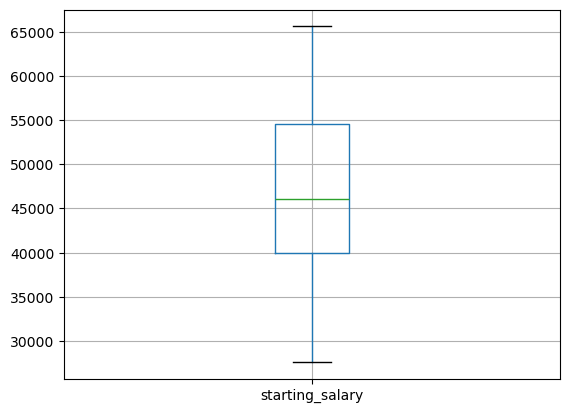

In [ ]:
df.loc[
    (df["gender"]== "Female") & (df["field_of_study"] == "Medicine") & (df["current_job_level"] == "Executive")
    ,
    ["starting_salary"]
    ].boxplot()
plt.show()

In [ ]:
df.groupby(cat_cols, as_index=False).agg({
    'starting_salary': [
        ( 'lower_bound' , lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25))  ), 
        ( 'upper_bound' , lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25))  )
    ]
}).head(1)

gender field_of_study current_job_level starting_salary            
                                               lower_bound upper_bound
0  Female           Arts             Entry         14775.0     87375.0

### Diccionario para hacer dinamico el calculo de los lower bound y upper bound


In [ ]:
diccionario = {}
new_col = []
for i in num_cols:
    new_col.append(f"{i}_lower_bound")
    new_col.append(f"{i}_upper_bound")
    diccionario[i] = [
        ('lower_bound' , lambda x: x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))),
        ('upper_bound', lambda x: x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)))
    ]
    



In [ ]:
new_col

['age_lower_bound',
 'age_upper_bound',
 'high_school_gpa_lower_bound',
 'high_school_gpa_upper_bound',
 'sat_score_lower_bound',
 'sat_score_upper_bound',
 'university_ranking_lower_bound',
 'university_ranking_upper_bound',
 'university_gpa_lower_bound',
 'university_gpa_upper_bound',
 'internship_completed_lower_bound',
 'internship_completed_upper_bound',
 'projects_completed_lower_bound',
 'projects_completed_upper_bound',
 'certifications_lower_bound',
 'certifications_upper_bound',
 'soft_skills_score_lower_bound',
 'soft_skills_score_upper_bound',
 'networking_score_lower_bound',
 'networking_score_upper_bound',
 'job_offers_lower_bound',
 'job_offers_upper_bound',
 'starting_salary_lower_bound',
 'starting_salary_upper_bound',
 'career_satisfaction_lower_bound',
 'career_satisfaction_upper_bound',
 'years_to_promotion_lower_bound',
 'years_to_promotion_upper_bound',
 'work_life_balance_lower_bound',
 'work_life_balance_upper_bound']

In [ ]:
df_final = df.groupby( cat_cols, as_index = False).agg(
    diccionario
)

In [ ]:
df_final

gender field_of_study current_job_level         age              \
                                            lower_bound upper_bound   
0   Female           Arts             Entry      11.000      35.000   
1   Female           Arts         Executive      13.375      36.375   
2   Female           Arts               Mid       9.500      37.500   
3   Female           Arts            Senior      13.500      33.500   
4   Female       Business             Entry       9.500      37.500   
..     ...            ...               ...         ...         ...   
78   Other    Mathematics            Senior      13.250      31.250   
79   Other       Medicine             Entry      10.000      38.000   
80   Other       Medicine         Executive      21.000      21.000   
81   Other       Medicine               Mid      17.000      33.000   
82   Other       Medicine            Senior      14.250      32.250   

   high_school_gpa               sat_score             university_ranking  \
       lower_bound upper_bound lower_bound upper_bound        lower_bound   
0           1.2400      4.8000     586.500    1910.500           -449.250   
1           1.0800      5.4400     497.125    2090.125           -287.125   
2           0.6775      5.2975     560.500    1944.500           -401.250   
3           1.4700      4.3500     587.000    1955.000           -414.500   
4           1.1200      4.8800     696.500    1908.500           -479.000   
..             ...         ...         ...         ...                ...   
78          1.4875      4.6275     743.750    1289.750              2.000   
79          1.1450      4.3850     765.750    1827.750           -824.500   
80          2.3300      2.3300    1034.000    1034.000            155.000   
81          0.7950      5.0350     645.000    1803.000           -722.250   
82          1.2300      4.5900    1019.750    1617.750            -62.250   

    ...  job_offers             starting_salary              \
    ... lower_bound upper_bound     lower_bound upper_bound   
0   ...        -3.5         8.5         14775.0     87375.0   
1   ...        -3.5         8.5         11500.0     92900.0   
2   ...        -3.5         8.5          7975.0     90175.0   
3   ...        -3.5         8.5         16200.0     89800.0   
4   ...        -3.5         8.5          8300.0     92300.0   
..  ...         ...         ...             ...         ...   
78  ...        -1.5         6.5         29300.0     96500.0   
79  ...        -2.0         6.0          -975.0    102425.0   
80  ...         3.0         3.0         32000.0     32000.0   
81  ...        -3.0         5.0        -27062.5    121237.5   
82  ...        -1.0         3.0          8775.0     56575.0   

   career_satisfaction             years_to_promotion              \
           lower_bound upper_bound        lower_bound upper_bound   
0               -4.500      15.500             -1.000       7.000   
1               -4.125      14.875             -1.000       7.000   
2               -4.500      15.500             -1.000       7.000   
3               -4.500      15.500             -1.000       7.000   
4               -3.000      13.000             -1.000       7.000   
..                 ...         ...                ...         ...   
78              -1.250       8.750              4.000       4.000   
79              -2.000      14.000             -1.000       7.000   
80               5.000       5.000              5.000       5.000   
81               1.500      11.500             -0.375       6.625   
82               1.000       9.000              3.250       5.250   

   work_life_balance              
         lower_bound upper_bound  
0              -3.00       13.00  
1              -6.00       16.00  
2              -4.50       15.50  
3              -3.50       16.50  
4              -4.50       15.50  
..               ...         ...  
78              3.00        7.00  
79             -6.25       15.75  
80        

In [ ]:
df_final.groupby(cat_cols, as_index=False).head(1)


gender field_of_study current_job_level         age              \
                                            lower_bound upper_bound   
0   Female           Arts             Entry      11.000      35.000   
1   Female           Arts         Executive      13.375      36.375   
2   Female           Arts               Mid       9.500      37.500   
3   Female           Arts            Senior      13.500      33.500   
4   Female       Business             Entry       9.500      37.500   
..     ...            ...               ...         ...         ...   
78   Other    Mathematics            Senior      13.250      31.250   
79   Other       Medicine             Entry      10.000      38.000   
80   Other       Medicine         Executive      21.000      21.000   
81   Other       Medicine               Mid      17.000      33.000   
82   Other       Medicine            Senior      14.250      32.250   

   high_school_gpa               sat_score             university_ranking  \
       lower_bound upper_bound lower_bound upper_bound        lower_bound   
0           1.2400      4.8000     586.500    1910.500           -449.250   
1           1.0800      5.4400     497.125    2090.125           -287.125   
2           0.6775      5.2975     560.500    1944.500           -401.250   
3           1.4700      4.3500     587.000    1955.000           -414.500   
4           1.1200      4.8800     696.500    1908.500           -479.000   
..             ...         ...         ...         ...                ...   
78          1.4875      4.6275     743.750    1289.750              2.000   
79          1.1450      4.3850     765.750    1827.750           -824.500   
80          2.3300      2.3300    1034.000    1034.000            155.000   
81          0.7950      5.0350     645.000    1803.000           -722.250   
82          1.2300      4.5900    1019.750    1617.750            -62.250   

    ...  job_offers             starting_salary              \
    ... lower_bound upper_bound     lower_bound upper_bound   
0   ...        -3.5         8.5         14775.0     87375.0   
1   ...        -3.5         8.5         11500.0     92900.0   
2   ...        -3.5         8.5          7975.0     90175.0   
3   ...        -3.5         8.5         16200.0     89800.0   
4   ...        -3.5         8.5          8300.0     92300.0   
..  ...         ...         ...             ...         ...   
78  ...        -1.5         6.5         29300.0     96500.0   
79  ...        -2.0         6.0          -975.0    102425.0   
80  ...         3.0         3.0         32000.0     32000.0   
81  ...        -3.0         5.0        -27062.5    121237.5   
82  ...        -1.0         3.0          8775.0     56575.0   

   career_satisfaction             years_to_promotion              \
           lower_bound upper_bound        lower_bound upper_bound   
0               -4.500      15.500             -1.000       7.000   
1               -4.125      14.875             -1.000       7.000   
2               -4.500      15.500             -1.000       7.000   
3               -4.500      15.500             -1.000       7.000   
4               -3.000      13.000             -1.000       7.000   
..                 ...         ...                ...         ...   
78              -1.250       8.750              4.000       4.000   
79              -2.000      14.000             -1.000       7.000   
80               5.000       5.000              5.000       5.000   
81               1.500      11.500             -0.375       6.625   
82               1.000       9.000              3.250       5.250   

   work_life_balance              
         lower_bound upper_bound  
0              -3.00       13.00  
1              -6.00       16.00  
2              -4.50       15.50  
3              -3.50       16.50  
4              -4.50       15.50  
..               ...         ...  
78              3.00        7.00  
79             -6.25       15.75  
80        

In [ ]:
df_final.columns = cat_cols + new_col

In [ ]:
df_final

,gender,field_of_study,current_job_level,age_lower_bound,age_upper_bound,high_school_gpa_lower_bound,high_school_gpa_upper_bound,sat_score_lower_bound,sat_score_upper_bound,university_ranking_lower_bound,...,job_offers_lower_bound,job_offers_upper_bound,starting_salary_lower_bound,starting_salary_upper_bound,career_satisfaction_lower_bound,career_satisfaction_upper_bound,years_to_promotion_lower_bound,years_to_promotion_upper_bound,work_life_balance_lower_bound,work_life_balance_upper_bound
0,Female,Arts,Entry,11.000,35.000,1.2400,4.8000,586.500,1910.500,-449.250,...,-3.5,8.5,14775.0,87375.0,-4.500,15.500,-1.000,7.000,-3.00,13.00
1,Female,Arts,Executive,13.375,36.375,1.0800,5.4400,497.125,2090.125,-287.125,...,-3.5,8.5,11500.0,92900.0,-4.125,14.875,-1.000,7.000,-6.00,16.00
2,Female,Arts,Mid,9.500,37.500,0.6775,5.2975,560.500,1944.500,-401.250,...,-3.5,8.5,7975.0,90175.0,-4.500,15.500,-1.000,7.000,-4.50,15.50
3,Female,Arts,Senior,13.500,33.500,1.4700,4.3500,587.000,1955.000,-414.500,...,-3.5,8.5,16200.0,89800.0,-4.500,15.500,-1.000,7.000,-3.50,16.50
4,Female,Business,Entry,9.500,37.500,1.1200,4.8800,696.500,1908.500,-479.000,...,-3.5,8.5,8300.0,92300.0,-3.000,13.000,-1.000,7.000,-4.50,15.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Other,Mathematics,Senior,13.250,31.250,1.4875,4.6275,743.750,1289.750,2.000,...,-1.5,6.5,29300.0,96500.0,-1.250,8.750,4.000,4.000,3.00,7.00
79,Other,Medicine,Entry,10.000,38.000,1.1450,4.3850,765.750,1827.750,-824.500,...,-2.0,6.0,-975.0,102425.0,-2.000,14.000,-1.000,7.000,-6.25,15.75
80,Other,Medicine,Executive,21.000,21.000,2.3300,2.3300,1034.000,1034.000,155.000,...,3.0,3.0,32000.0,32000.0,5.000,5.000,5.000,5.000,5.00,5.00
81,Other,Medicine,Mid,17.000,33.000,0.7950,5.0350,645.000,1803.000,-722.250,...,-3.0,5.0,-27062.5,121237.5,1.500,11.500,-0.375,6.625,-6.75,15.25


In [ ]:
df_merge = df.merge(
    df_final,
    on = cat_cols,
    how = 'inner'
)

In [ ]:
for i in num_cols:
    df_merge = df_merge.loc[
        (df_merge[i] <= df_merge[f'{i}_upper_bound'])&(df_merge[i] >= df_merge[f'{i}_lower_bound']), :
        ]
    


In [ ]:
df_merge

,age,gender,high_school_gpa,sat_score,university_ranking,university_gpa,field_of_study,internship_completed,projects_completed,certifications,...,job_offers_lower_bound,job_offers_upper_bound,starting_salary_lower_bound,starting_salary_upper_bound,career_satisfaction_lower_bound,career_satisfaction_upper_bound,years_to_promotion_lower_bound,years_to_promotion_upper_bound,work_life_balance_lower_bound,work_life_balance_upper_bound
0,24,Male,3.58,1052,291,3.96,Arts,3,7,2,...,-3.5,8.5,11462.5,90162.5,-2.000,14.000,-1.0,7.0,-4.50,15.50
2,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,...,-3.5,8.5,13662.5,87962.5,-4.500,15.500,-1.0,7.0,-7.00,17.00
3,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,...,-3.5,8.5,3862.5,90962.5,-2.000,14.000,-2.5,9.5,-3.50,16.50
4,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,...,-3.5,8.5,12250.0,86250.0,-2.000,14.000,-1.0,7.0,-4.50,15.50
5,24,Male,2.40,1600,631,3.78,Law,2,3,2,...,-3.5,8.5,9825.0,91225.0,-4.500,15.500,-1.0,7.0,-3.75,14.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,26,Female,2.44,1258,776,2.44,Arts,3,7,3,...,-3.5,8.5,7975.0,90175.0,-4.500,15.500,-1.0,7.0,-4.50,15.50
4996,18,Female,3.94,1032,923,3.73,Law,0,9,3,...,-3.5,8.5,8600.0,94200.0,-6.000,18.000,-1.0,7.0,-7.00,17.00
4997,19,Female,3.45,1299,720,2.52,Law,3,5,5,...,-3.5,8.5,4500.0,93700.0,-3.250,14.750,-2.5,9.5,-3.25,14.75
4998,19,Male,2.70,1038,319,3.94,Law,1,4,5,...,-3.5,8.5,9825.0,91225.0,-4.500,15.500,-1.0,7.0,-3.75,14.25


In [8]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "job_offers": ["count"]
})

prob_freq.columns = cat_cols + ["user"]

NameError: name 'df' is not defined